# Jay Bhanushali - 60009200047
---
# TSA Lab 9: GARCH

In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Microsoft_Stock.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,04-01-2015,40.60,40.76,40.31,40.72,36865322
1,04-02-2015,40.66,40.74,40.12,40.29,37487476
2,04-06-2015,40.34,41.78,40.18,41.55,39223692
3,04-07-2015,41.61,41.91,41.31,41.53,28809375
4,04-08-2015,41.48,41.69,41.04,41.42,24753438


In [4]:
data.Date.dtype

dtype('O')

In [5]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [6]:
df = data['Close']
df.index = data['Date']
df.head()

Date
2015-04-01    40.72
2015-04-02    40.29
2015-04-06    41.55
2015-04-07    41.53
2015-04-08    41.42
Name: Close, dtype: float64

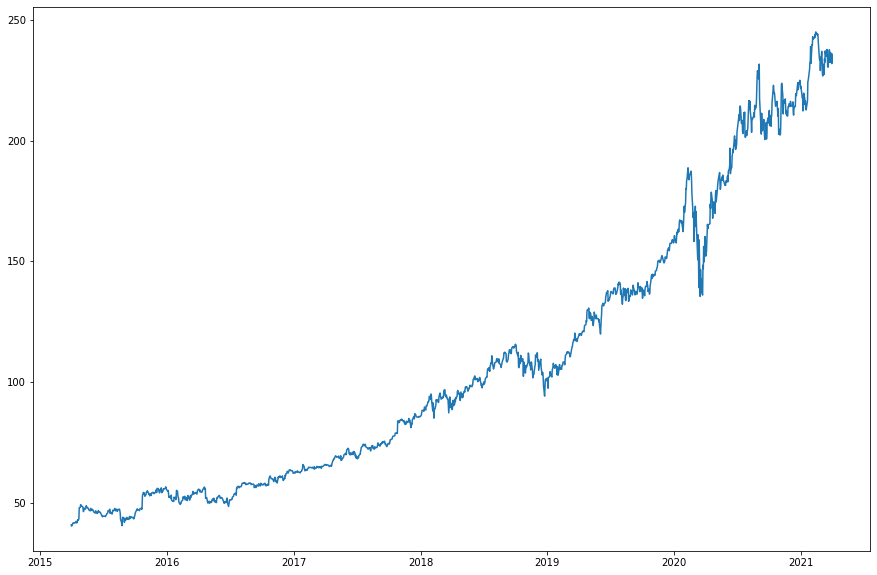

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df)

## Applying 1st differencing to make the data stationary

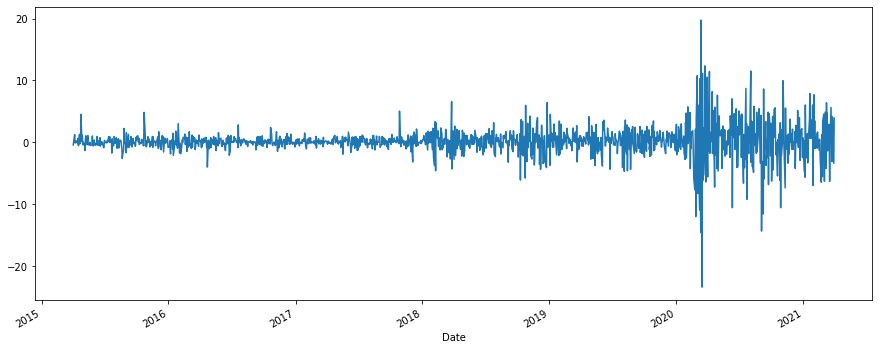

In [8]:
df = df.diff().dropna()
df.plot(figsize=(15,6))

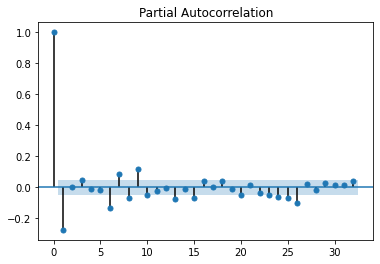

In [9]:
plot_pacf(df)
plt.show()

## GARCH(1,1) model

In [10]:
garch = arch_model(df,vol='Garch', p=1, q=1)
result = garch.fit()
result.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 315704439150.6643
Iteration:      2,   Func. Count:     14,   Neg. LLF: 996946292.6950306
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2822.7757263119966
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2739.443754043734
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2976.546022429628
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2667.423827601132
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2668.120679232954
Iteration:      8,   Func. Count:     50,   Neg. LLF: 8644.317700488013
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2666.9665277706486
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2666.96473491601
Iteration:     11,   Func. Count:     66,   Neg. LLF: 2666.965918047734
Iteration:     12,   Func. Count:     72,   Neg. LLF: 2666.9644893495733
Iteration:     13,   Func. Count:     77,   Neg. LLF: 2666.964488258338
Iteration:     14,   Func. Count:     81,   Neg. LLF: 2666.964

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2666.96
Distribution:                  Normal   AIC:                           5341.93
Method:            Maximum Likelihood   BIC:                           5363.21
                                        No. Observations:                 1510
Date:                Sat, Dec 03 2022   Df Residuals:                     1509
Time:                        12:25:23   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0861  2.619e-02      3.287  1.012e-03 [3.476e-02,  0.137]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0585  3.038e-02      1.926  5.414e-02 [-1.040e-03,  0.118]
alpha[1]       0.1783  6.586e-02      2.707  6.790e-03  [4.920e-02,  0.307]
beta[1]        0.8147  5.943e-02     13.707  9.192e-43    [  0.698,  0.931]
===========================================================================

Covariance estimator: robust
"""

## Rolling predictions

In [17]:
def rolling_predictions(df, test_size):
  rolling_pred = []
  for i in range(test_size):
    train = df[:-(test_size-i)]
    model = arch_model(train, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    pred = res.forecast(horizon=1)
    rolling_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_pred = pd.Series(rolling_pred, index = df.index[-test_size:])
  return rolling_pred

### Test size: 10 %

In [20]:
test_size = int(0.1*df.shape[0]) # 10 % test size
rolling_pred = rolling_predictions(df, test_size)

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

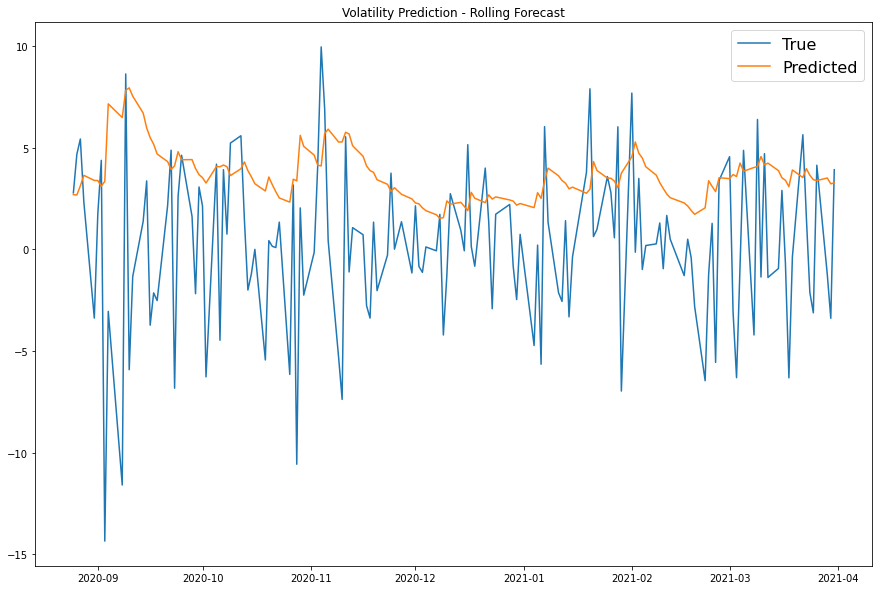

In [21]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)

### Test size: 20 %

In [18]:
test_size = int(0.2*df.shape[0])
rolling_pred = rolling_predictions(df, test_size)

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

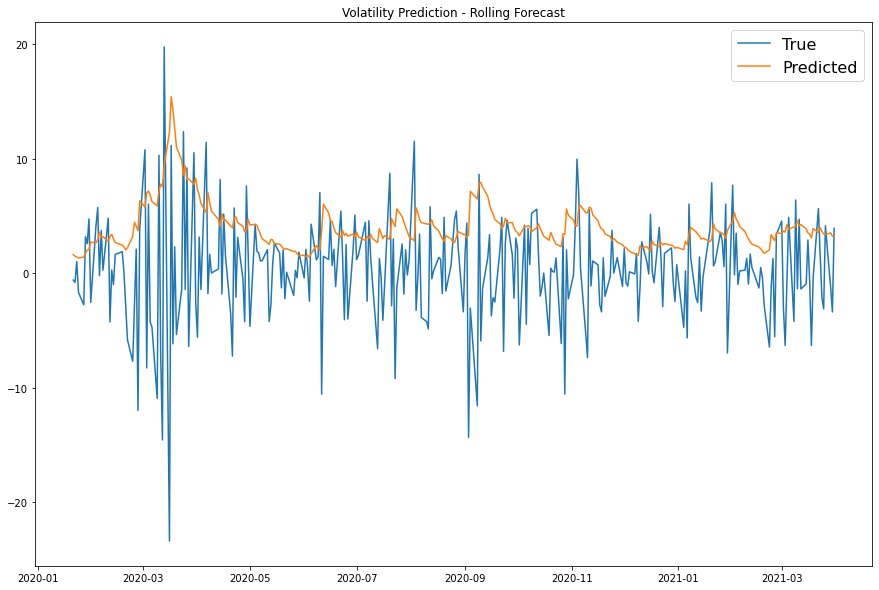

In [19]:
plt.figure(figsize=(15,10))
true, = plt.plot(df[-test_size:])
pred, = plt.plot(rolling_pred)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True','Predicted'], fontsize=16)